This project work is about predicting perovskite stability  using tolerance factor which can be learned from machine learning models
# Perovskites and the Goldschmidt tolerance factor

Perovskites constitute a class of materials having the basic formula $ABX_3$ and displaying a common structure in which a smaller metal cation $B$ (e.g. a transition metal) resides in corner-sharing octahedra of $X$ anions (e.g. $O^{2-}$, $Cl^-$, $Br^-$) and a larger $A$ metal cation (e.g. alkali, alkaline earth or lanthanide) has a 12-fold coordination with the $X$ anions. This class of compounds has a remarkable variety of electronic, magnetic, optical, mechanical, and transport properties. Such variety is derived from the possibility of tuning the materials propertites by the composition. About 90% of the metallic chemical elements of the periodic table can be stabilized in a perovskite structure. Therefore, perovskites are versatile materials suitable for a number of applications including photovoltaics, thermoelectrics and catalysis. 

The first step to design new perovskites is to assess their stability. For this purpose, the Goldschmidt tolerance factor, $t$, has been extensively used to predict the stability of a material in the perovskite structure based on the (Shannon) ionic radii,$r_i$, of each ion $(A,B,X)$ in the chemical formula $ABX_3$: 

$$ t=\frac{r_A+r_X}{\sqrt2(r_B+r_X)} $$

$t$ measures how much the $A$-site cation fits into the corner-sharing octahedral network in a cubic crystal structure. It indicates the compatibilty of a given set of ions with the ideal, cubic perovskite structure ($t\approx1$). Distortions from the cubic structure arise from size mismatch between cations and anions, which results in perovskite structures other than cubic (e.g. orthorhombic, rhombohedral). However, when these distortions are too large, the perovskite structure may be unstable and non-perovskites structures are rather formed.

The accuracy of the Goldschmidt factor is, however, often insufficient to screen for new potential materials and several modification have been proposed to overcome this issue. In this tutorial, we show how data can be used to derive tolerance factors for perovskite stability. 

This dataset is collected based on the following publication:

<div style="padding: 1ex; margin-top: 1ex; margin-bottom: 1ex; border-style: dotted; border-width: 1pt; border-color: blue; border-radius: 3px;">
C. Bartel, C. Sutton, B. R. Goldsmith, R. Ouyang, C. B. Musgrave, Luca M. Ghiringhelli, M. Scheffler: <span style="font-style: italic;">New tolerance factor to predict the stability of perovskite oxides and halides</span>, Sci. Adv.  5, eaav0693 (2019) <a href="https://advances.sciencemag.org/content/advances/5/2/eaav0693.full.pdf" target="_blank">[PDF]</a> .
</div>

Some scripts and data tables for this notebook have been adapted from the content of: 
<div style="padding: 1ex; margin-top: 1ex; margin-bottom: 1ex; border-style: dotted; border-width: 1pt; border-color: blue; border-radius: 3px;">
<a href="https://github.com/CJBartel/perovskite-stability" target="_blank">https://github.com/CJBartel/perovskite-stability</a> 
</div>



<p style="
    padding: 10px;
    background-color: darkgreen;
    margin: 0;
    color: #ffffff;
    font-family: 'Trebuchet';
    font-size: 24px;
    text-align: center;
    border: 3px solid green;
    border-radius: 10px 30px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
">Table of Contents</p>


<div style="border: 3px solid #A084CA; background-color: green; padding: 10px;">
  <ul>
    <li>
      <strong><a href="#1" style="color: #ffffff;">Step 1: Import Necessary Libraries</a></strong>
    </li>
    <li>
      <strong><a href="#2" style="color: #ffffff;">Step 2: Load the Dataset</a></strong>
    </li>
    <li>
      <strong><a href="#3" style="color: #ffffff;">Step 3: Basic Data Exploration</a></strong>
    </li>
    <li>
      <strong><a href="#4" style="color: #ffffff;">Step 4: Data Visualization</a></strong>
    </li>
     <li>
      <strong><a href="#5" style="color: #ffffff;">Step 5: Data Preprocessing</a></strong>
    </li>
    <li>
      <strong><a href="#6" style="color: #ffffff;">Step 6: Model Building</a></strong>
    </li>
  </ul>
</div>


<a id="1"></a>
<p style="
    padding: 10px;
    background-color: darkgreen;
    margin: 0;
    color: #ffffff;
    font-family: 'Trebuchet';
    font-size: 24px;
    text-align: center;
    border: 3px solid green;
    border-radius: 10px 30px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
"> Import Necessary Libraries</p>

In [142]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<a id="2"></a>

<p style="
    padding: 10px;
    background-color: darkgreen;
    margin: 0;
    color: #ffffff;
    font-family: 'Trebuchet';
    font-size: 24px;
    text-align: center;
    border: 3px solid green;
    border-radius: 10px 30px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
">Load the Dataset</p>

In [143]:
# Load the dataset
df = pd.read_csv('D:/DATA/Kaggle dataset/perovskite-stability-master/perovskite-stability-master/train.csv')

target = 'exp_label'
labels = [0, 1]
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

,material,rA,rB,rX,nA,nB,nX,rA_rB_ratio,rA_rX_ratio,rB_rX_ratio,...,HOMO_X,LUMO_X,EA_X,IP_X,rX_rB_ratio,t_sisso,t,tau,p_t_sisso,exp_label
0,AgBiO3,1.28,0.76,1.40,1,5,-2,1.68421,0.914286,0.542857,...,-9.030485,-0.068724,-3.078804,16.431366,1.842106,4.072915,0.877338,4.072915,6.317036e-01,0
1,AgBrO3,1.28,0.31,1.40,1,5,-2,4.12903,0.914286,0.221429,...,-9.030485,-0.068724,-3.078804,16.431366,4.516120,6.427902,1.108217,6.427911,1.171850e-04,0
2,AgCaCl3,1.28,1.00,1.81,1,2,-1,1.28000,0.707182,0.552486,...,-8.594666,0.019724,-3.935230,13.876021,1.810001,5.995124,0.777568,5.995124,6.189050e-04,0
3,AgCdBr3,1.28,0.95,1.96,1,2,-1,1.34737,0.653061,0.484694,...,-7.858439,0.055110,-3.678151,12.554312,2.063157,5.582190,0.787296,5.582190,3.100880e-03,0
4,AgClO3,1.28,0.12,1.40,1,5,-2,10.66670,0.914286,0.085714,...,-9.030485,-0.068724,-3.078804,16.431366,11.666665,15.172845,1.246744,15.172847,7.750000e-19,0


In [144]:
print('\n\033[1mInference:\033[0m The Dataset consists of {} features & {} materials.'.format(df.shape[1], df.shape[0]))


Inference: The Dataset consists of 37 features & 576 materials.


<a id="3"></a>

<p style="
    padding: 10px;
    background-color: darkgreen;
    margin: 0;
    color: #ffffff;
    font-family: 'Trebuchet';
    font-size: 24px;
    text-align: center;
    border: 3px solid green;
    border-radius: 10px 30px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
">Basic Data Exploration</p>

In [145]:
# LISTING OUT THE COLUMNS
df.columns

Index(['material', 'rA', 'rB', 'rX', 'nA', 'nB', 'nX', 'rA_rB_ratio',
       'rA_rX_ratio', 'rB_rX_ratio', 'rS_A', 'rP_A', 'Z_A', 'HOMO_A', 'LUMO_A',
       'EA_A', 'IP_A', 'rS_B', 'rP_B', 'Z_B', 'HOMO_B', 'LUMO_B', 'EA_B',
       'IP_B', 'rS_X', 'rP_X', 'Z_X', 'HOMO_X', 'LUMO_X', 'EA_X', 'IP_X',
       'rX_rB_ratio', 't_sisso', 't', 'tau', 'p_t_sisso', 'exp_label'],
      dtype='object')

In [146]:
# Get data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   material     576 non-null    object 
 1   rA           576 non-null    float64
 2   rB           576 non-null    float64
 3   rX           576 non-null    float64
 4   nA           576 non-null    int64  
 5   nB           576 non-null    int64  
 6   nX           576 non-null    int64  
 7   rA_rB_ratio  576 non-null    float64
 8   rA_rX_ratio  576 non-null    float64
 9   rB_rX_ratio  576 non-null    float64
 10  rS_A         576 non-null    float64
 11  rP_A         576 non-null    float64
 12  Z_A          576 non-null    int64  
 13  HOMO_A       576 non-null    float64
 14  LUMO_A       576 non-null    float64
 15  EA_A         576 non-null    float64
 16  IP_A         576 non-null    float64
 17  rS_B         576 non-null    float64
 18  rP_B         576 non-null    float64
 19  Z_B     

#### $INFERENCE$ - EXCEPT THE 1ST COLUMN 'MATERIAL' REST ALL ARE NUMERIC VALUES

In [147]:
# shape
print("Data Size  :" ,df.size)
print("Data Shape :" ,df.shape)

Data Size  : 21312
Data Shape : (576, 37)


In [148]:
#Checking number of unique rows in each feature

df.nunique()

material       576
rA              45
rB              54
rX               5
nA               5
nB               5
nX               2
rA_rB_ratio    379
rA_rX_ratio     88
rB_rX_ratio    106
rS_A            49
rP_A            49
Z_A             49
HOMO_A          49
LUMO_A          49
EA_A            49
IP_A            49
rS_B            67
rP_B            67
Z_B             67
HOMO_B          67
LUMO_B          67
EA_B            67
IP_B            67
rS_X             5
rP_X             5
Z_X              5
HOMO_X           5
LUMO_X           5
EA_X             5
IP_X             5
rX_rB_ratio    106
t_sisso        498
t              478
tau            498
p_t_sisso      498
exp_label        2
dtype: int64

In [149]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 25 numerical & 11 categorical features.


In [150]:
# Get summary statistics
df.describe()

,rA,rB,rX,nA,nB,nX,rA_rB_ratio,rA_rX_ratio,rB_rX_ratio,rS_A,...,HOMO_X,LUMO_X,EA_X,IP_X,rX_rB_ratio,t_sisso,t,tau,p_t_sisso,exp_label
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,...,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000
mean,1.357969,0.700330,1.528490,1.930556,2.991319,-1.640625,2.261691,0.897602,0.459857,1.669876,...,-9.014950,0.112947,-3.383102,15.878179,2.555829,5.219587,0.924968,5.219587,5.404525e-01,0.543403
std,0.318998,0.231042,0.259552,0.909106,1.078612,0.480234,1.616515,0.207009,0.142081,0.654048,...,0.931724,0.380885,0.453476,2.076549,1.583855,9.234035,0.117980,9.234035,4.055042e-01,0.498546
min,0.540000,0.120000,1.330000,1.000000,1.000000,-2.000000,1.021050,0.385714,0.085714,0.269600,...,-11.111416,-0.068724,-4.336301,11.131355,0.985183,1.200151,0.713127,1.200152,6.840000e-284,0.000000
25%,1.110000,0.600000,1.400000,1.000000,2.000000,-2.000000,1.607840,0.767956,0.385714,1.235500,...,-9.030485,-0.068724,-3.678151,16.431366,1.842106,3.453368,0.852435,3.453368,5.770484e-02,0.000000
50%,1.360000,0.690000,1.400000,2.000000,3.000000,-2.000000,1.850570,0.885714,0.457143,1.791700,...,-9.030485,-0.068724,-3.078804,16.431366,2.187499,4.072064,0.903434,4.072065,6.324963e-01,1.000000
75%,1.640000,0.800000,1.400000,3.000000,4.000000,-1.000000,2.265462,1.028570,0.542857,2.198750,...,-9.030485,0.019724,-3.078804,16.431366,2.592595,4.851237,0.977254,4.851237,9.486254e-01,1.000000
max,1.880000,1.350000,2.200000,5.000000,5.000000,-1.000000,14.333300,1.413530,1.015040,2.535700,...,-7.083940,1.136682,-3.078804,19.391595,11.666665,181.532448,1.451433,181.532447,9.999885e-01,1.000000


In [151]:
# CHECKING OUT FOR NULL VALUES
df.isnull().sum()

material       0
rA             0
rB             0
rX             0
nA             0
nB             0
nX             0
rA_rB_ratio    0
rA_rX_ratio    0
rB_rX_ratio    0
rS_A           0
rP_A           0
Z_A            0
HOMO_A         0
LUMO_A         0
EA_A           0
IP_A           0
rS_B           0
rP_B           0
Z_B            0
HOMO_B         0
LUMO_B         0
EA_B           0
IP_B           0
rS_X           0
rP_X           0
Z_X            0
HOMO_X         0
LUMO_X         0
EA_X           0
IP_X           0
rX_rB_ratio    0
t_sisso        0
t              0
tau            0
p_t_sisso      0
exp_label      0
dtype: int64

In [152]:
# Counting the number of duplicates
num_duplicates = df.duplicated().sum()
print("Number of duplicates rows in dataset:   ", num_duplicates)

Number of duplicates rows in dataset:    0


### $INFERENCE$ - NO NULL OR MISSING VALUES or DUPLICATE VALUES

---

 <a id="#4"></a>
 
 <p style="
    padding: 10px;
    background-color: darkgreen;
    margin: 0;
    color: #ffffff;
    font-family: 'Trebuchet';
    font-size: 24px;
    text-align: center;
    border: 3px solid green;
    border-radius: 10px 30px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
">Data Visualization</p>

In [153]:
# DROPPPING A OBJECT COLUMN
df_numeric = df.drop('material', axis = 1)
df_numeric.head()

,rA,rB,rX,nA,nB,nX,rA_rB_ratio,rA_rX_ratio,rB_rX_ratio,rS_A,...,HOMO_X,LUMO_X,EA_X,IP_X,rX_rB_ratio,t_sisso,t,tau,p_t_sisso,exp_label
0,1.28,0.76,1.40,1,5,-2,1.68421,0.914286,0.542857,1.3241,...,-9.030485,-0.068724,-3.078804,16.431366,1.842106,4.072915,0.877338,4.072915,6.317036e-01,0
1,1.28,0.31,1.40,1,5,-2,4.12903,0.914286,0.221429,1.3241,...,-9.030485,-0.068724,-3.078804,16.431366,4.516120,6.427902,1.108217,6.427911,1.171850e-04,0
2,1.28,1.00,1.81,1,2,-1,1.28000,0.707182,0.552486,1.3241,...,-8.594666,0.019724,-3.935230,13.876021,1.810001,5.995124,0.777568,5.995124,6.189050e-04,0
3,1.28,0.95,1.96,1,2,-1,1.34737,0.653061,0.484694,1.3241,...,-7.858439,0.055110,-3.678151,12.554312,2.063157,5.582190,0.787296,5.582190,3.100880e-03,0
4,1.28,0.12,1.40,1,5,-2,10.66670,0.914286,0.085714,1.3241,...,-9.030485,-0.068724,-3.078804,16.431366,11.666665,15.172845,1.246744,15.172847,7.750000e-19,0


 <a id="4.5"></a>
<p style="
    padding: 6px;
    background-color: green;
    margin: 2px 100px 2px 0px;
    color: #ffffff;
    font-family: 'Trebuchet';
    font-size: 16px;
    text-align: center;
    border: 3px solid green;
    border-radius: 20px 50px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
">Correlation Heatmap</p>

In [154]:
# the correlation matrix
corr_matrix = df_numeric.corr()

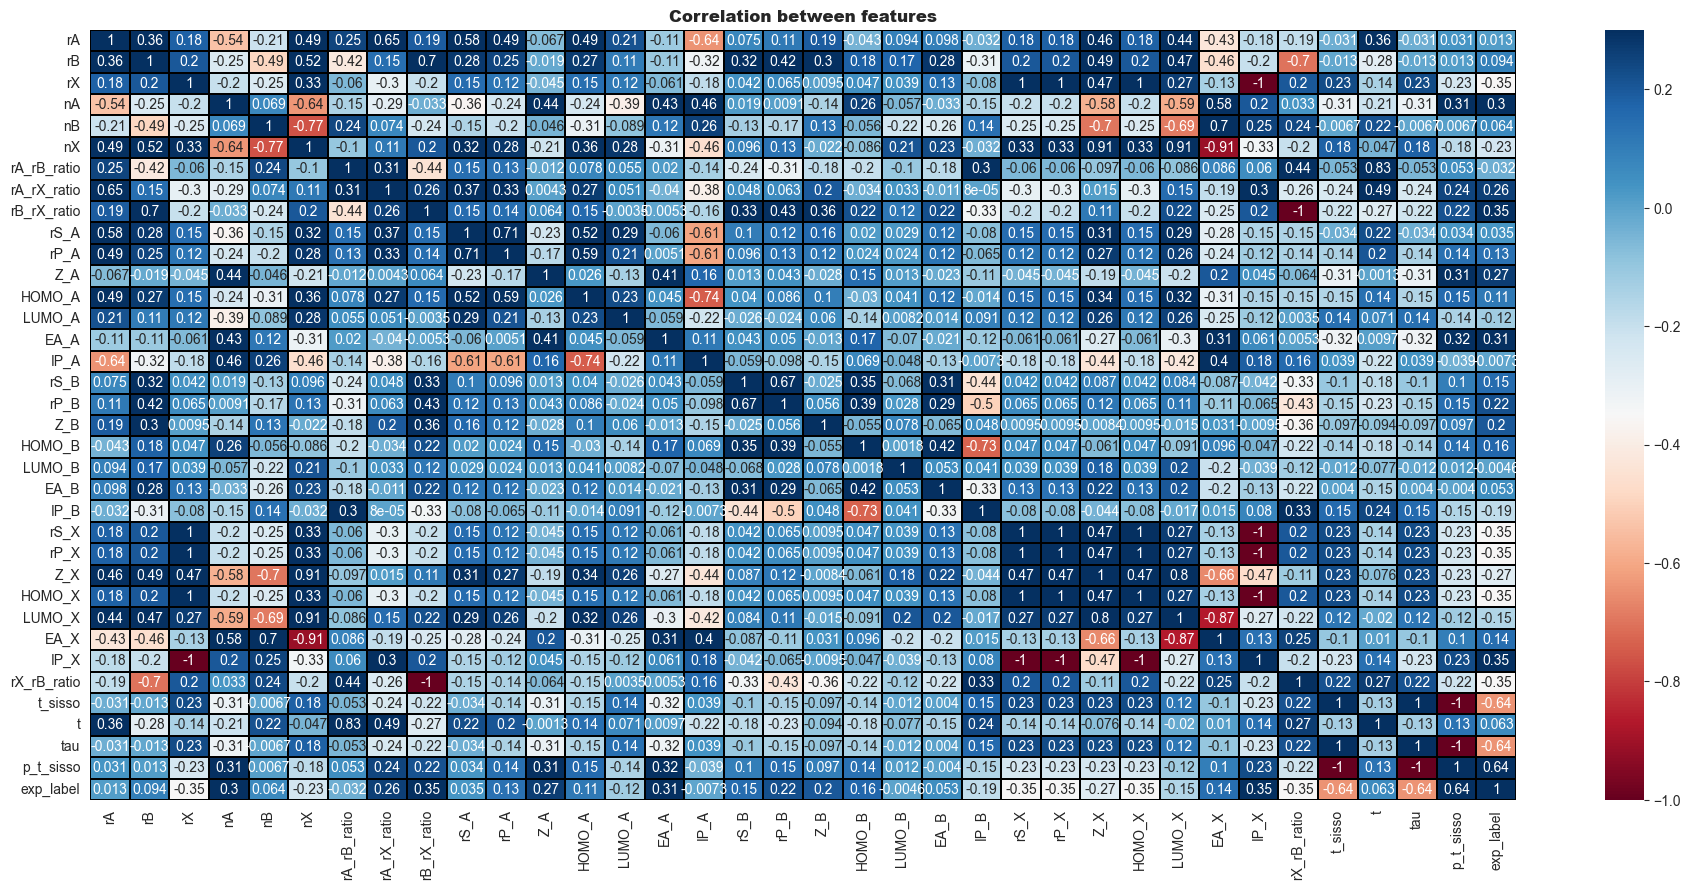

In [155]:
# Correlation heatmap
corr = df_numeric.corr(method='kendall')
plt.figure(figsize=(23, 10))
sns.heatmap(corr, vmax=.3, linewidths=0.05, annot=True, cmap='RdBu', linecolor="black")
plt.title('Correlation between features', weight = 'heavy')
plt.show()

In [156]:
corr_matrix1 = corr_matrix.abs()
upper_tri = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool_))

<Axes: >

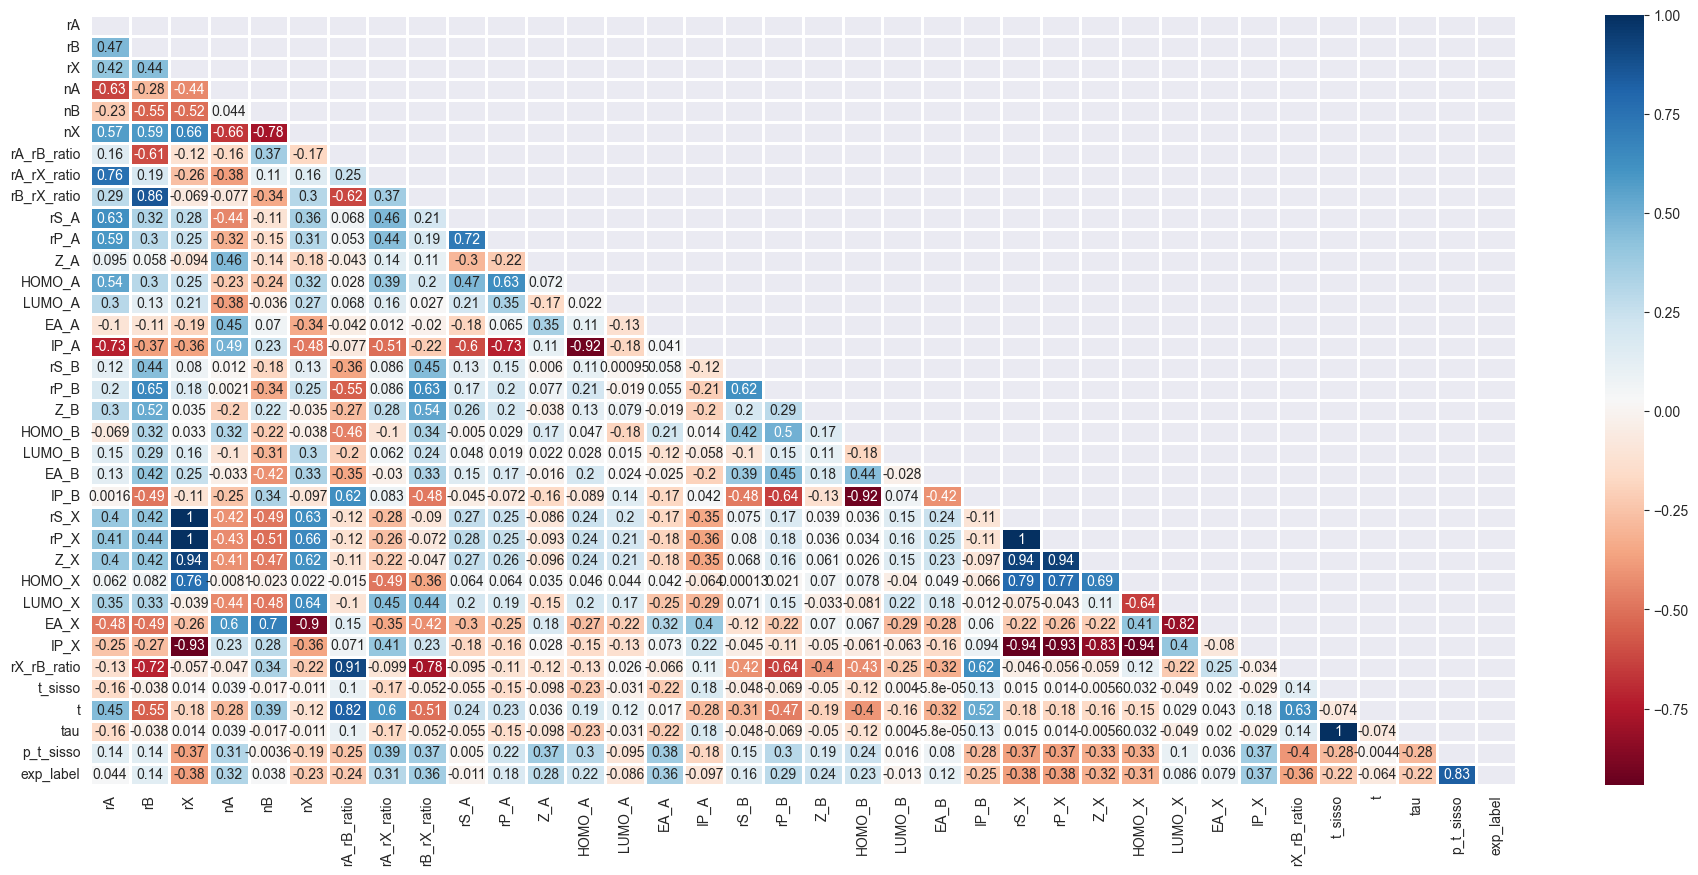

In [157]:
sns.set_style('dark')
plt.figure(figsize=(23, 10))
matrix = np.triu(corr_matrix)
sns.heatmap(df_numeric.corr(), annot = True, linewidth = .8, mask = matrix, cmap = 'RdBu', cbar = True)


In [158]:
# DROPPING OUT CALCULATED FEATURES
df_1 = df.drop(['material','t_sisso', 't', 'tau','p_t_sisso'],axis = 1)
df_1.head()

,rA,rB,rX,nA,nB,nX,rA_rB_ratio,rA_rX_ratio,rB_rX_ratio,rS_A,...,IP_B,rS_X,rP_X,Z_X,HOMO_X,LUMO_X,EA_X,IP_X,rX_rB_ratio,exp_label
0,1.28,0.76,1.40,1,5,-2,1.68421,0.914286,0.542857,1.3241,...,7.913870,0.4608,0.4333,8,-9.030485,-0.068724,-3.078804,16.431366,1.842106,0
1,1.28,0.31,1.40,1,5,-2,4.12903,0.914286,0.221429,1.3241,...,12.554312,0.4608,0.4333,8,-9.030485,-0.068724,-3.078804,16.431366,4.516120,0
2,1.28,1.00,1.81,1,2,-1,1.28000,0.707182,0.552486,1.3241,...,6.309260,0.6785,0.7567,17,-8.594666,0.019724,-3.935230,13.876021,1.810001,0
3,1.28,0.95,1.96,1,2,-1,1.34737,0.653061,0.484694,1.3241,...,9.271930,0.7514,0.8834,35,-7.858439,0.055110,-3.678151,12.554312,2.063157,0
4,1.28,0.12,1.40,1,5,-2,10.66670,0.914286,0.085714,1.3241,...,13.876021,0.4608,0.4333,8,-9.030485,-0.068724,-3.078804,16.431366,11.666665,0


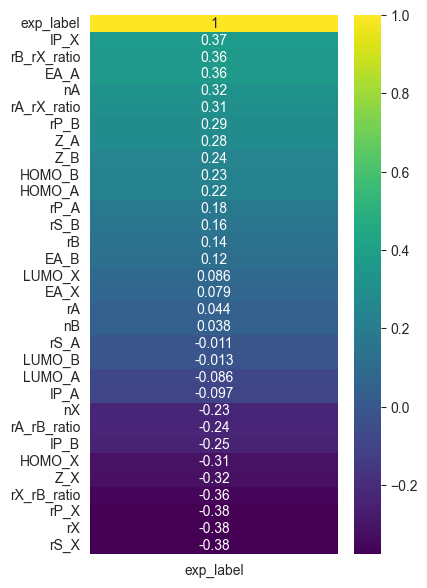

In [159]:
# PLOTTING THE MOST CORRELATING FEATURES
plt.figure(figsize=(4, 7)) 
heatmap = sns.heatmap(df_1.corr()[['exp_label']].sort_values(['exp_label'], ascending = False), annot = True, cmap = 'viridis')

 <a id="4.1"></a>
 <p style="
    padding: 17px;
    background-color: green;
    margin: px 100px 2px 0px;
    color: #ffffff;
    font-family: 'Trebuchet';
    font-size: 25px;
    text-align: center;
    border: 3px solid green;
    border-radius: 20px 50px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
">Histograms and Distribution Plots</p>

 <a id="4.5"></a>
<p style="
    padding: 6px;
    background-color: green;
    margin: 2px 100px 2px 0px;
    color: #ffffff;
    font-family: 'Trebuchet';
    font-size: 16px;
    text-align: center;
    border: 3px solid green;
    border-radius: 20px 50px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
">Distribution Plots by Target Variable</p>

In [160]:
numeric_cols = df[['t_sisso', 't', 'tau']]
numeric_cols

,t_sisso,t,tau
0,4.072915,0.877338,4.072915
1,6.427902,1.108217,6.427911
2,5.995124,0.777568,5.995124
3,5.582190,0.787296,5.582190
4,15.172845,1.246744,15.172847
...,...,...,...
571,2.862641,0.859622,2.862642
572,2.520342,0.876815,2.520340
573,4.472872,0.819453,4.472870
574,3.218232,0.847164,3.218230


In [161]:
colors=['orange', 'green']

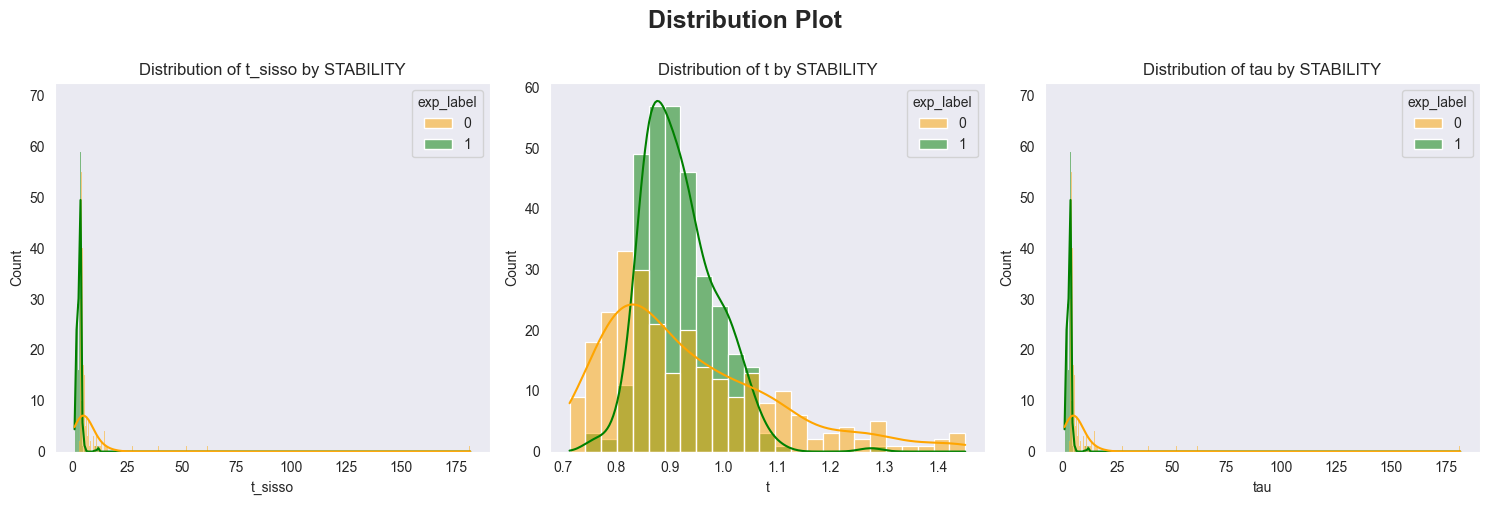

In [162]:
# Distribution plots of numerical variables by target variable
plt.figure(figsize=(15, 5))
plt.suptitle('Distribution Plot', y=1, weight='bold', fontsize=18)

for n, col in enumerate(numeric_cols):
    plt.subplot(1, 3, n + 1)
    sns.histplot(data=df, x=col, kde=True, hue='exp_label', palette=colors)
    plt.title(f'Distribution of {col} by STABILITY')

plt.tight_layout()
plt.show()

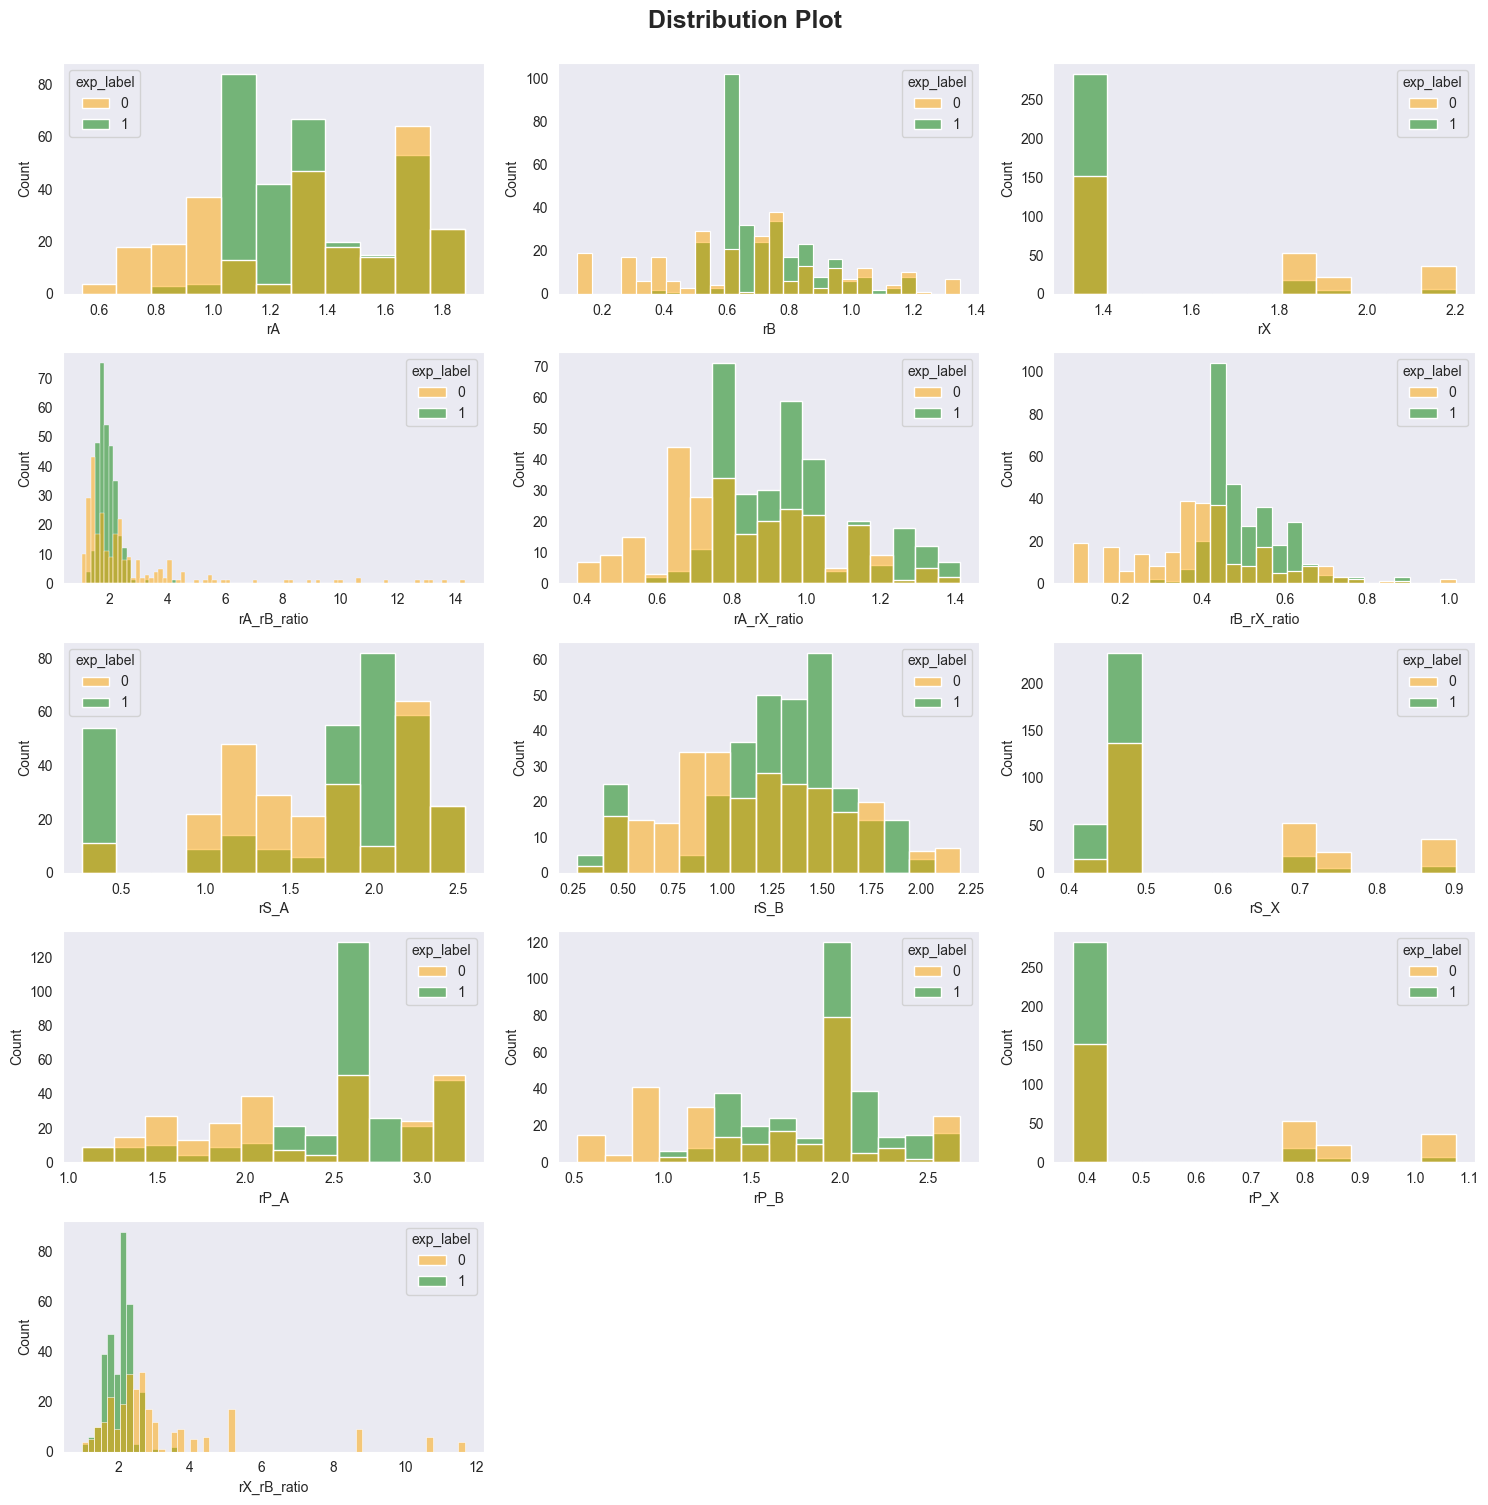

In [163]:
radius_columns = df_numeric[['rA', 'rB', 'rX', 'rA_rB_ratio', 'rA_rX_ratio', 'rB_rX_ratio','rS_A', 'rS_B', 'rS_X','rP_A', 'rP_B','rP_X', 'rX_rB_ratio']]

# Distribution plots of radius  by target variable
plt.figure(figsize=(15, 15))
plt.suptitle('Distribution Plot', y=1, weight='bold', fontsize =18)

for n, col in enumerate(radius_columns):
    plt.subplot(5, 3, n + 1)
    sns.histplot(data=df_numeric, x=col, hue='exp_label', palette=colors)
    #plt.title(f'Distribution of {col} by STABILITY')
plt.tight_layout()
plt.show()

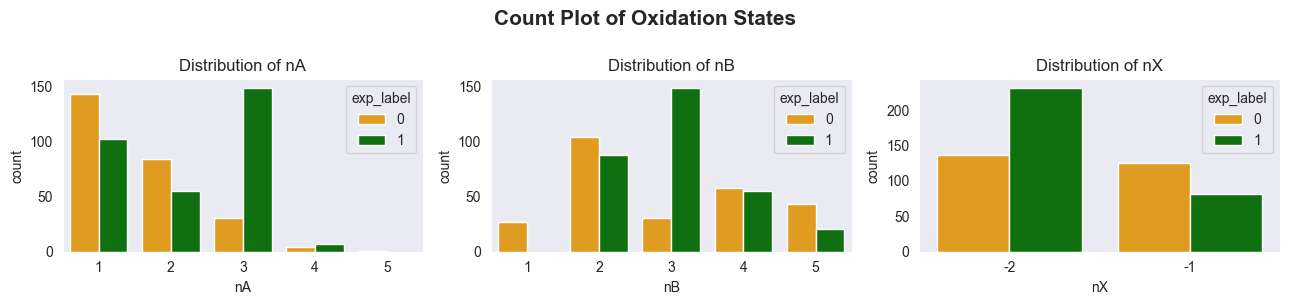

In [164]:

na_columns = df_numeric[['nA', 'nB', 'nX']]  # Subset the columns of interest

# Distribution plots of radius by target variable
plt.figure(figsize=(13, 3))
plt.suptitle('Count Plot of Oxidation States', y=1, weight='bold', fontsize=15)

for n, col in enumerate(na_columns):
    plt.subplot(1, 3, n + 1)
    sns.countplot(x=col, data=df_numeric, hue = 'exp_label', palette= colors)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


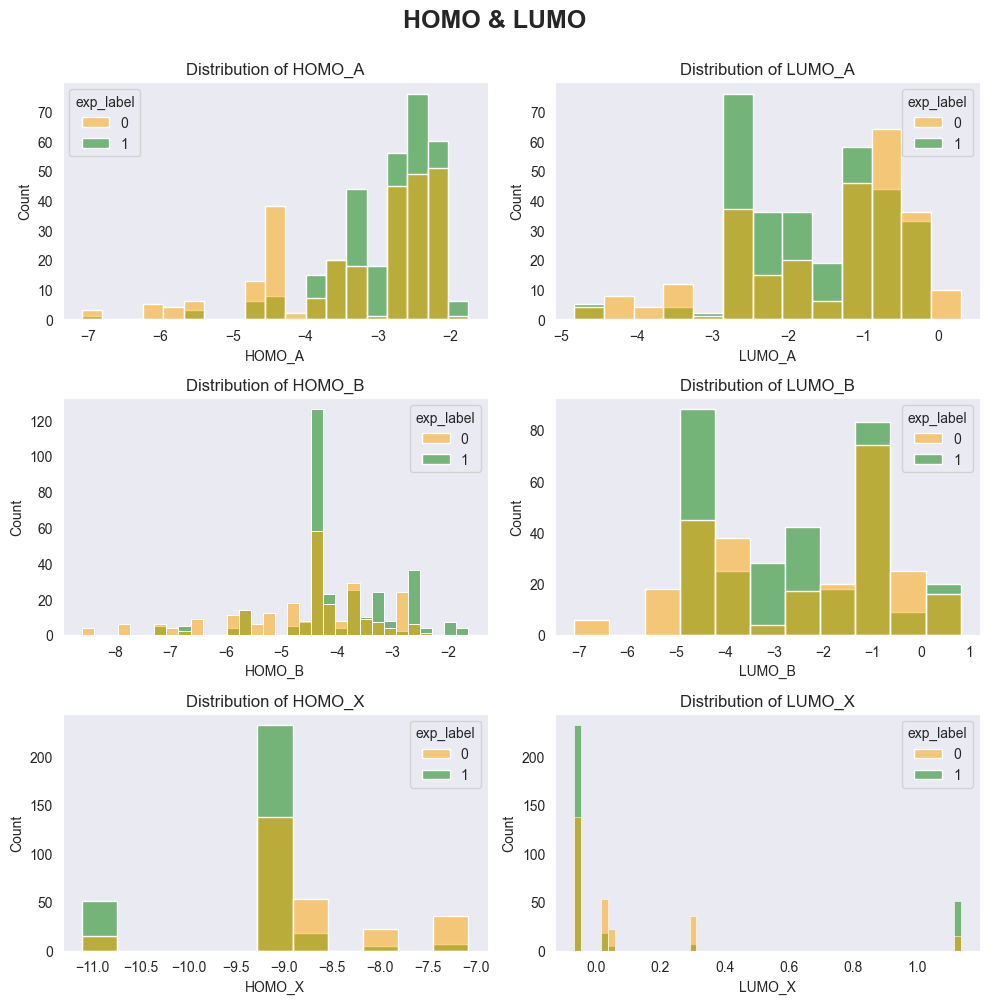

In [165]:

hl_columns = df_numeric[['HOMO_A', 'LUMO_A','HOMO_B', 'LUMO_B','HOMO_X', 'LUMO_X']]  # Subset the columns of interest

# Distribution plots of radius by target variable
plt.figure(figsize=(10, 10))
plt.suptitle('HOMO & LUMO', y=1, weight='bold', fontsize=18)

for n, col in enumerate(hl_columns):
    plt.subplot(3, 2, n + 1)
    sns.histplot(x=col, data=df_numeric, hue = 'exp_label', palette= colors)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


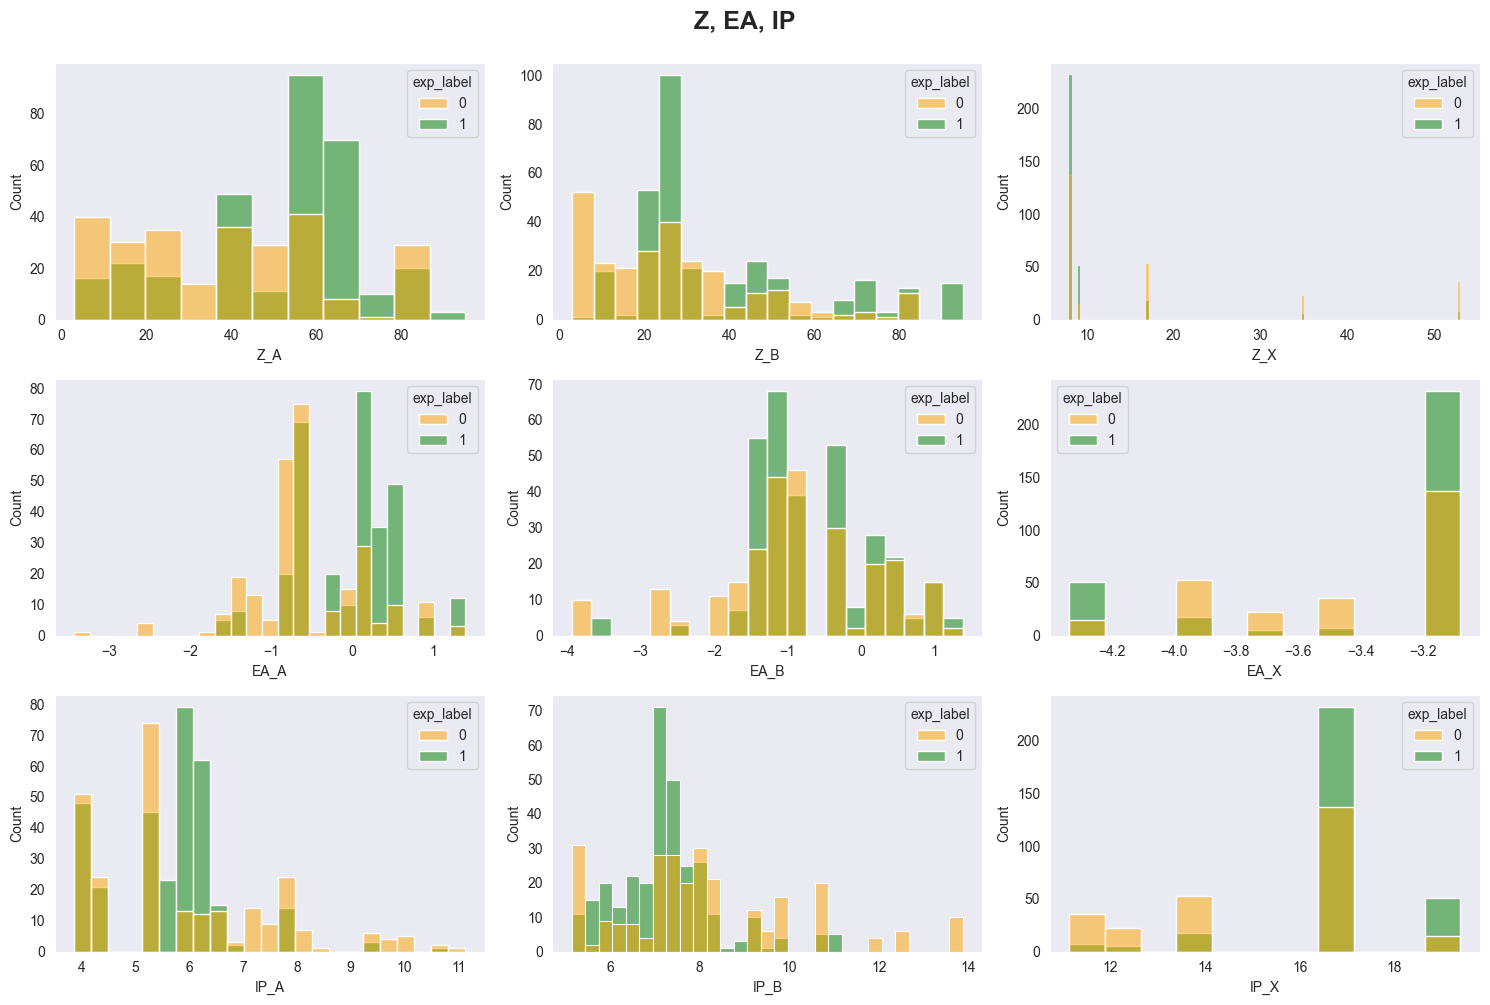

In [166]:
ei_columns = df_numeric[['Z_A','Z_B', 'Z_X', 'EA_A','EA_B','EA_X', 'IP_A','IP_B','IP_X' ]]  # Subset the columns of interest

# Distribution plots of radius by target variable
plt.figure(figsize=(15, 10))
plt.suptitle('Z, EA, IP', y=1, weight='bold', fontsize=18)

for n, col in enumerate(ei_columns):
    plt.subplot(3, 3, n + 1)
    sns.histplot(x=col, data=df_numeric, hue = 'exp_label', palette= colors)
    #plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

 <a id="4.2"></a>
<p style="
    padding: 6px;
    background-color: green;
    margin: 2px 100px 2px 0px;
    color: #ffffff;
    font-family: ''Trebuchet';
    font-size: 16px;
    text-align: center;
    border: 3px solid green;
    border-radius: 20px 50px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
">Box Plots</p>

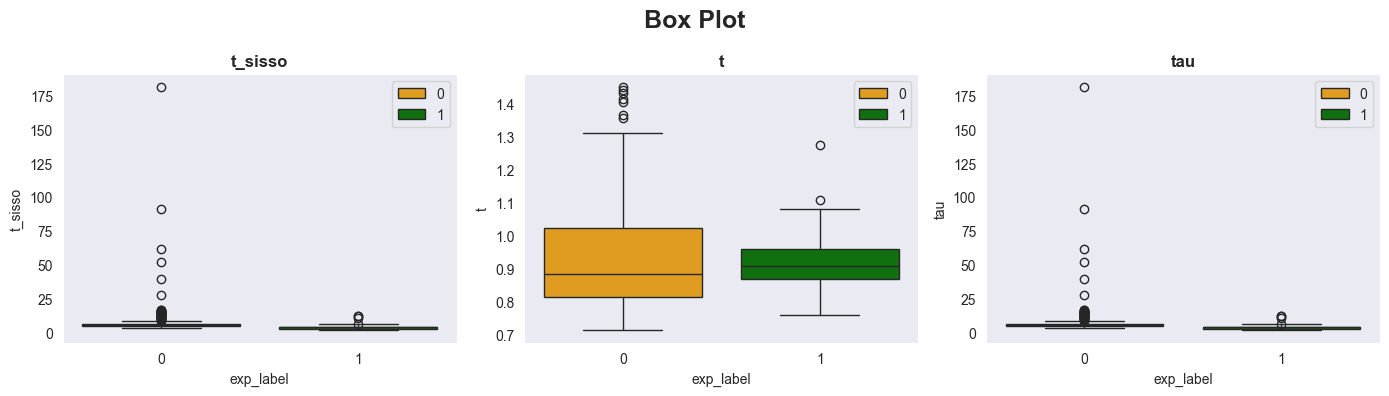

In [167]:
# Box plots for numerical variables
plt.figure(figsize=(14, 4))
plt.suptitle('Box Plot', weight='bold', fontsize=18)  

for n, col in enumerate(numeric_cols):
    plt.subplot(1, 3, n + 1)
    sns.boxplot(data=df, x='exp_label', y=col, hue='exp_label', palette=colors)
    plt.title(f'{col}', weight='bold')
    plt.legend()
plt.tight_layout()
plt.show()


 <a id="4.4"></a>
 <p style="
    padding: 6px;
    background-color: green;
    margin: 2px 100px 2px 0px;
    color: #ffffff;
    font-family: ''Trebuchet';
    font-size: 16px;
    text-align: center;
    border: 3px solid green;
    border-radius: 20px 50px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
"> Pie Plots</p>

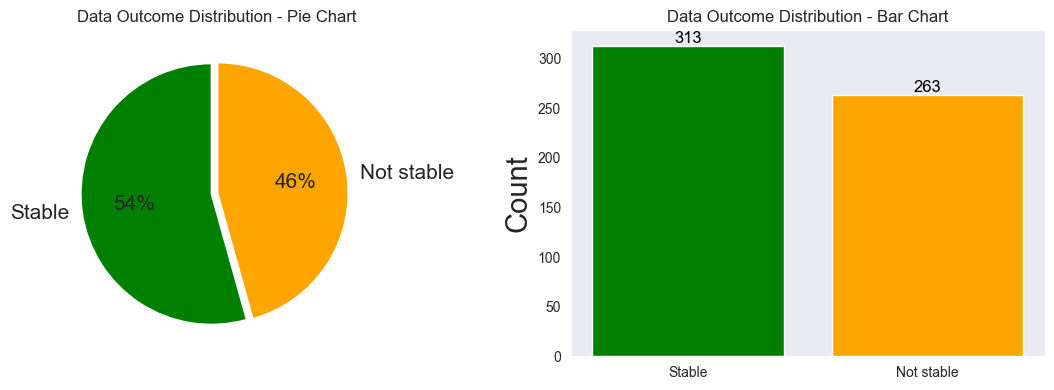

In [168]:
fig, axes = plt.subplots(ncols=2, figsize=(11, 4))
colors=['green', 'orange']
# Pie chart for 'Perovskite Stability'
counts = df['exp_label'].value_counts()
labels = ['Stable', 'Not stable']

axes[0].pie(counts, labels=labels, autopct='%.0f%%', startangle=90, explode=[0.04, 0.01],colors=colors, textprops={'fontsize': 15})
axes[0].set_title('Data Outcome Distribution - Pie Chart')
axes[1].bar(labels, counts, color= colors)


for i, count in enumerate(counts):
    axes[1].text(i, count, str(count), ha='center', va='bottom', fontsize=12, color='black')

axes[1].set_title('Data Outcome Distribution - Bar Chart')
axes[1].set_ylabel('Count',fontsize=21)
plt.tight_layout()
plt.show()

 <a id="5"></a>

<p style="
    padding: 10px;
    background-color: darkgreen;
    margin: 0;
    color: #ffffff;
    font-family: 'Trebuchet';
    font-size: 24px;
    text-align: center;
    border: 3px solid green;
    border-radius: 10px 30px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
">Data Preprocessing</p>

In [169]:
# splitting into independant and target features
X = df_numeric.iloc[:, :-5]
y= df_numeric['exp_label']

In [170]:
X.head()

,rA,rB,rX,nA,nB,nX,rA_rB_ratio,rA_rX_ratio,rB_rX_ratio,rS_A,...,EA_B,IP_B,rS_X,rP_X,Z_X,HOMO_X,LUMO_X,EA_X,IP_X,rX_rB_ratio
0,1.28,0.76,1.40,1,5,-2,1.68421,0.914286,0.542857,1.3241,...,-1.654229,7.913870,0.4608,0.4333,8,-9.030485,-0.068724,-3.078804,16.431366,1.842106
1,1.28,0.31,1.40,1,5,-2,4.12903,0.914286,0.221429,1.3241,...,-3.678151,12.554312,0.4608,0.4333,8,-9.030485,-0.068724,-3.078804,16.431366,4.516120
2,1.28,1.00,1.81,1,2,-1,1.28000,0.707182,0.552486,1.3241,...,0.149995,6.309260,0.6785,0.7567,17,-8.594666,0.019724,-3.935230,13.876021,1.810001
3,1.28,0.95,1.96,1,2,-1,1.34737,0.653061,0.484694,1.3241,...,0.948262,9.271930,0.7514,0.8834,35,-7.858439,0.055110,-3.678151,12.554312,2.063157
4,1.28,0.12,1.40,1,5,-2,10.66670,0.914286,0.085714,1.3241,...,-3.935230,13.876021,0.4608,0.4333,8,-9.030485,-0.068724,-3.078804,16.431366,11.666665


In [171]:
y

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: exp_label, Length: 576, dtype: int64

 <a id="5.1"></a>

<p style="
    padding: 10px;
    background-color: darkgreen;
    margin: 0;
    color: #ffffff;
    font-family: 'Trebuchet';
    font-size: 24px;
    text-align: center;
    border: 3px solid green;
    border-radius: 10px 30px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
">Feature Scaling</p>

In [172]:
## standardize the dataset

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [173]:
X_scaled = std_scaler.fit_transform(X)
X_scaled

array([[-0.24463037,  0.25848938, -0.49547385, ...,  0.67161808,
         0.26662844, -0.45101558],
       [-0.24463037, -1.69089806, -0.49547385, ...,  0.67161808,
         0.26662844,  1.23874682],
       [-0.24463037,  1.29816267,  1.08554363, ..., -1.2186059 ,
        -0.96501413, -0.47130345],
       ...,
       [-0.87213913,  0.17184993, -0.49547385, ...,  0.67161808,
         0.26662844, -0.41955377],
       [-0.87213913, -0.13138811, -0.49547385, ...,  0.67161808,
         0.26662844, -0.2946481 ],
       [-0.87213913, -0.26134727, -0.49547385, ...,  0.67161808,
         0.26662844, -0.23275459]])

 <a id="595"></a>

<p style="
    padding: 10px;
    background-color: darkgreen;
    margin: 0;
    color: #ffffff;
    font-family: 'Trebuchet';
    font-size: 24px;
    text-align: center;
    border: 3px solid green;
    border-radius: 10px 30px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
">Training and Testing Dataset</p>

In [174]:
### Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size= 0.2, random_state=40, stratify = y)

In [175]:
print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',X_train.shape, y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (576, 31) (576,) 
Training set  --->  (460, 31) (460,) 
Testing set   --->  (116, 31)  (116,)


In [176]:
## standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [177]:
X_train = scaler.fit_transform(X_train)

In [178]:
X_test = scaler.transform(X_test)

 <a id="7"></a>

<p style="
    padding: 10px;
    background-color: darkgreen;
    margin: 0;
    color: #ffffff;
    font-family: 'Trebuchet';
    font-size: 24px;
    text-align: center;
    border: 3px solid green;
    border-radius: 10px 30px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
">Model Building </p>

List of Models
<ul>
      <li> 1. Logistic regression</li>
      <li> 2. Decision Tree Classifier</li>
      <li> 3. Random Forest Classifier</li>
      <li> 4. ExtraTrees Classifier</li>
      <li> 5. Support Vector Classifier</li>
      <li> 6. K Neighbours Classifier</li>
      <li> 7. GradientBoost Classifier</li>
      <li> 8. Naive-Bayes</li>
      <li> 9. AdaBoost Classifier</li>    
</div> 

### Importing the libraries for model

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier

### Creating the object of the model :

In [180]:
LR  = LogisticRegression()
DT  = DecisionTreeClassifier()
RF  = RandomForestClassifier()
ETC = ExtraTreesClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()
GBC = GradientBoostingClassifier() 
NB  = GaussianNB()
ABC = AdaBoostClassifier()

In [181]:
from sklearn.model_selection import cross_val_score

In [182]:
models = [LR, DT, RF, ETC, SVM, KNN , GBC, ABC, NB]
features = X_scaled
labels = y
CV = 5 # cross validation
accu_list = [] # Accuracy list
ModelName = [] #Model Name list

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring = 'accuracy', cv= CV)
    accu_list.append(accuracies.mean()*100)
    ModelName.append(model_name)

    
model_acc_df = pd.DataFrame({"Model"  :  ModelName, "Cross_Val_Accuracy" : accu_list})
model_acc_df = model_acc_df.sort_values(by='Cross_Val_Accuracy', ascending=False)
model_acc_df

,Model,Cross_Val_Accuracy
6,GradientBoostingClassifier,91.841079
7,AdaBoostClassifier,90.448276
2,RandomForestClassifier,89.935532
3,ExtraTreesClassifier,88.035982
1,DecisionTreeClassifier,86.124438
4,SVC,85.952024
5,KNeighborsClassifier,85.416792
0,LogisticRegression,84.047976
8,GaussianNB,82.815592


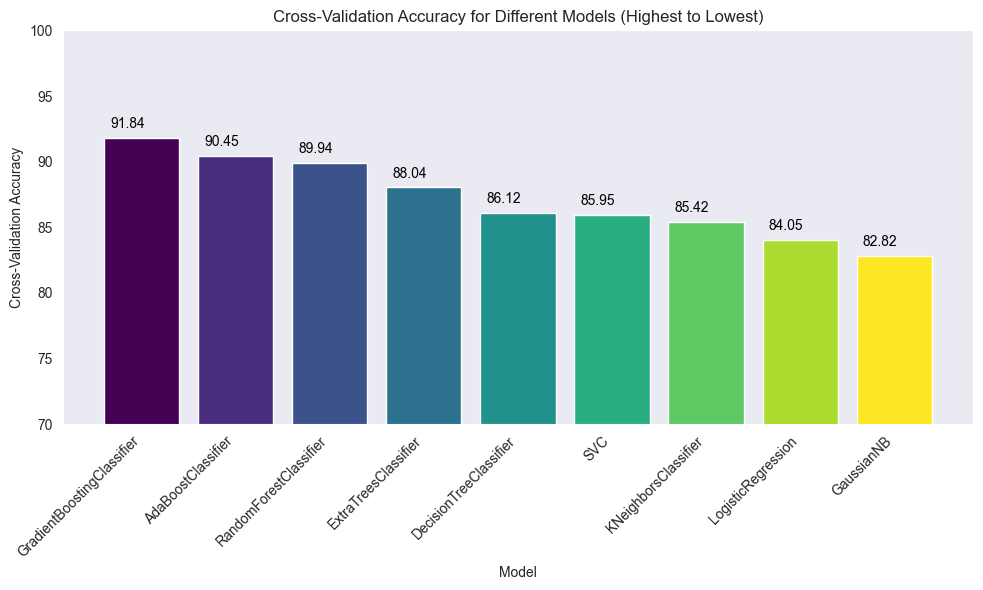

In [183]:
# Sort DataFrame by 'Cross_Val_Accuracy' in descending order
model_acc_df = model_acc_df.sort_values(by='Cross_Val_Accuracy', ascending=False)

# Create a color palette for bars
colors = plt.cm.viridis(np.linspace(0, 1, len(model_acc_df)))

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_acc_df["Model"], model_acc_df["Cross_Val_Accuracy"], color=colors)
plt.xlabel('Model')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for Different Models (Highest to Lowest)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.ylim(70, 100)  # Set y-axis limits

# Add values on top of the bars
for bar, value in zip(bars, model_acc_df["Cross_Val_Accuracy"]):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.5,
             f'{value:.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()

# Show plot
plt.show()

Taking the top three models for further analysis

In [184]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

In [185]:
GBC.fit(X_train, y_train)
y_pred_gbc = GBC.predict(X_test)

ABC.fit(X_train, y_train)
y_pred_abc = ABC.predict(X_test)

RF.fit(X_train, y_train)
y_pred_rf = RF.predict(X_test)

In [186]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        53
           1       0.91      0.97      0.94        63

    accuracy                           0.93       116
   macro avg       0.93      0.93      0.93       116
weighted avg       0.93      0.93      0.93       116



In [187]:
print(classification_report(y_test, y_pred_abc))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.93      0.98      0.95        63

    accuracy                           0.95       116
   macro avg       0.95      0.94      0.95       116
weighted avg       0.95      0.95      0.95       116



In [188]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        53
           1       0.92      0.97      0.95        63

    accuracy                           0.94       116
   macro avg       0.94      0.94      0.94       116
weighted avg       0.94      0.94      0.94       116



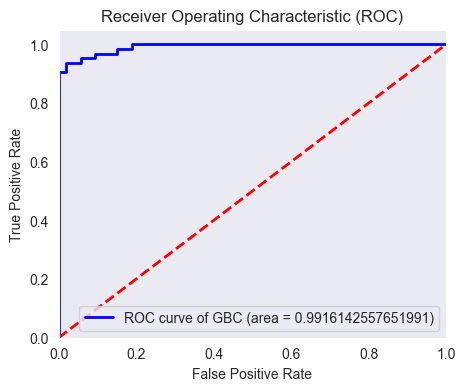

In [189]:
from sklearn.metrics import roc_curve, auc
y_scores = GBC.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 4))

plt.plot(fpr, tpr, color= 'blue', lw=2, label=f'ROC curve of GBC (area = {roc_auc})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

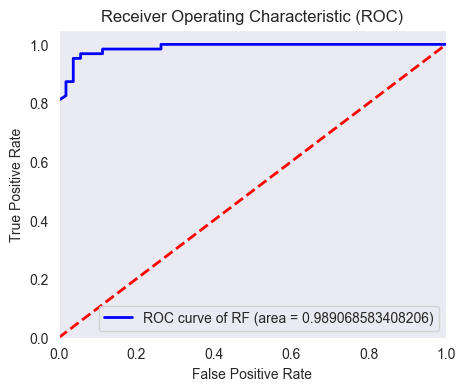

In [190]:
from sklearn.metrics import roc_curve, auc
y_scores = RF.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 4))

plt.plot(fpr, tpr, color= 'blue', lw=2, label=f'ROC curve of RF (area = {roc_auc})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

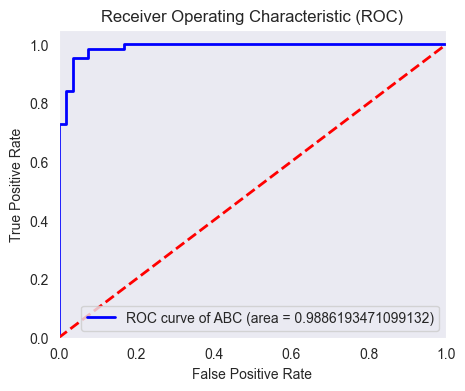

In [191]:
from sklearn.metrics import roc_curve, auc
y_scores = ABC.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 4))

plt.plot(fpr, tpr, color= 'blue', lw=2, label=f'ROC curve of ABC (area = {roc_auc})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

 <a id="7"></a>

<p style="
    padding: 10px;
    background-color: darkgreen;
    margin: 0;
    color: #ffffff;
    font-family: 'Trebuchet';
    font-size: 24px;
    text-align: center;
    border: 3px solid green;
    border-radius: 10px 30px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
">Top 3 Model Evaluation  </p>

#####  Let us create first create a table to store the results of various models 

In [192]:
Evaluation_Results = pd.DataFrame(np.zeros((3,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Random Forest Classifier (RF)', 'Gradient Boosting (GB)', 'AdaBoostClassifier(AB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
AdaBoostClassifier(AB),0.0,0.0,0.0,0.0,0.0


In [193]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def Classification_Summary(y_test, y_pred_best, i, Evaluation_Results):
    Evaluation_Results.iloc[i]['Accuracy'] = round(accuracy_score(y_test, y_pred_best), 3) * 100   
    Evaluation_Results.iloc[i]['Precision'] = round(precision_score(y_test, y_pred_best, average='micro'), 3) * 100
    Evaluation_Results.iloc[i]['Recall'] = round(recall_score(y_test, y_pred_best, average='micro'), 3) * 100
    Evaluation_Results.iloc[i]['F1-score'] = round(f1_score(y_test, y_pred_best, average='micro'), 3) * 100

    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3, '-'*25, Evaluation_Results.index[i], '-'*25, '>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(y_test, y_pred_best), 3) * 100))
    print('F1 Score = {}%'.format(round(f1_score(y_test, y_pred_best, average='micro'), 3) * 100))
    print('\n \033[1mConfusion Matrix:\033[0m\n', confusion_matrix(y_test, y_pred_best))
    print('\n\033[1mClassification Report:\033[0m\n', classification_report(y_test, y_pred_best))

---

## 1. Random Forest Classfier:

In [194]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming you have X_train, X_test, y_train, and y_test defined

params_RF = {"min_samples_split": [2, 6],
             "min_samples_leaf": [1, 4],
             "n_estimators": [100, 200, 300],
             "criterion": ["gini", 'entropy']
            }

cv_method = StratifiedKFold(n_splits=3)

GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(),
                                param_grid=params_RF,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=2,
                                scoring="accuracy",
                                return_train_score=True
                                )

GridSearchCV_RF.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 6],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [195]:
best_params_RF = GridSearchCV_RF.best_params_
print("Best Hyperparameters for Random Forest are = \n", best_params_RF)

best_estimator = GridSearchCV_RF.best_estimator_
y_pred_best = best_estimator.predict(X_test)


Best Hyperparameters for Random Forest are = 
 {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [196]:
Classification_Summary(y_test, y_pred_best, 0, Evaluation_Results)

<<<------------------------- Evaluating Random Forest Classifier (RF) ------------------------->>>

Accuracy = 93.10000000000001%
F1 Score = 93.10000000000001%

 Confusion Matrix:
 [[46  7]
 [ 1 62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92        53
           1       0.90      0.98      0.94        63

    accuracy                           0.93       116
   macro avg       0.94      0.93      0.93       116
weighted avg       0.94      0.93      0.93       116



---

## 2. Gradient Boosting Classfier:

In [197]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
params_GB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the cross-validation method
cv_method = StratifiedKFold(n_splits=3)

# Instantiate the GridSearchCV object
GridSearchCV_GB = GridSearchCV(estimator=GradientBoostingClassifier(),
                                param_grid=params_GB,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=2,
                                scoring='accuracy',
                                return_train_score=True)

# Fit the GridSearchCV object to the training data
GridSearchCV_GB.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=2,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [198]:
# Get the best parameters
best_params_GB = GridSearchCV_GB.best_params_
print("Best Hyperparameters for Gradient Boosting are = \n", best_params_GB)

# Get the best estimator
best_estimator_GB = GridSearchCV_GB.best_estimator_

# Fit the best estimator on the training data
best_estimator_GB.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best_GB = best_estimator_GB.predict(X_test)

Best Hyperparameters for Gradient Boosting are = 
 {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [199]:
# Print the classification report
Classification_Summary(y_test, y_pred_best_GB, 1, Evaluation_Results)

<<<------------------------- Evaluating Gradient Boosting (GB) ------------------------->>>

Accuracy = 94.8%
F1 Score = 94.8%

 Confusion Matrix:
 [[48  5]
 [ 1 62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.93      0.98      0.95        63

    accuracy                           0.95       116
   macro avg       0.95      0.94      0.95       116
weighted avg       0.95      0.95      0.95       116



In [200]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid
params_AB = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Define the cross-validation method
cv_method = StratifiedKFold(n_splits=3)

# Instantiate the GridSearchCV object
GridSearchCV_AB = GridSearchCV(estimator=AdaBoostClassifier(),
                                param_grid=params_AB,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=2,
                                scoring='accuracy',
                                return_train_score=True)

# Fit the GridSearchCV object to the training data
GridSearchCV_AB.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(), n_jobs=2,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [201]:
# Get the best parameters
best_params_AB = GridSearchCV_AB.best_params_
print("Best Hyperparameters for AdaBoost Classifier are = \n", best_params_AB)

# Get the best estimator
best_estimator_AB = GridSearchCV_AB.best_estimator_

# Fit the best estimator on the training data
best_estimator_AB.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best_AB = best_estimator_AB.predict(X_test)

Best Hyperparameters for AdaBoost Classifier are = 
 {'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 100}


In [202]:
# Print the classification report
Classification_Summary(y_test, y_pred_best_AB, 2, Evaluation_Results)

<<<------------------------- Evaluating AdaBoostClassifier(AB) ------------------------->>>

Accuracy = 95.7%
F1 Score = 95.7%

 Confusion Matrix:
 [[50  3]
 [ 2 61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.95      0.97      0.96        63

    accuracy                           0.96       116
   macro avg       0.96      0.96      0.96       116
weighted avg       0.96      0.96      0.96       116



In [203]:
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Random Forest Classifier (RF),93.1,93.1,93.1,93.1,0.0
Gradient Boosting (GB),94.8,94.8,94.8,94.8,0.0
AdaBoostClassifier(AB),95.7,95.7,95.7,95.7,0.0


##### Ada Boost Classifier(AB) MODEL WAS CHOSEN TO BUILD THE FINAL PREDICTION

 <a id="4.4"></a>
 <p style="
    padding: 6px;
    background-color: green;
    margin: 2px 100px 2px 0px;
    color: #ffffff;
    font-family: ''Trebuchet';
    font-size: 16px;
    text-align: center;
    border: 3px solid green;
    border-radius: 20px 50px;
    overflow: hidden;
    font-weight: bold;
    text-transform: uppercase;
"> PREDICTIVE SYSTEM</p>

In [204]:
X_train[1].reshape(1,-1)

array([[ 0.25963426, -0.05696745, -0.49982157,  0.0799162 ,  0.93971011,
        -0.75496084, -0.09535068,  0.63747359,  0.22751738,  0.44698041,
         0.17636775, -0.30877602, -0.54053472,  0.32262639,  0.64959831,
         0.10478052, -0.39517488, -0.84149232,  0.74281418,  0.49419213,
        -0.68171414, -0.31696765, -0.47606475, -0.47480259, -0.4959289 ,
        -0.46493766, -0.01791801, -0.47897865,  0.67701203,  0.26962587,
        -0.3251421 ]])

In [205]:
best_estimator.predict((X_train[1].reshape(1,-1)))

array([1], dtype=int64)

## Pickling The Model file For Deployment

In [206]:
import pickle

In [210]:
pickle.dump(best_estimator_AB,open('abmodel.pkl','wb'))

In [211]:
pickled_model=pickle.load(open('abmodel.pkl','rb'))

In [212]:
## Prediction
pickled_model.predict(X_train[21].reshape(1,-1))

array([0], dtype=int64)